<H1><center></center></H1>

# <center> תרגיל: חישוב נגזרות ורגרסיה לינארית בסיסית<center>
---
# Exercise: Calculating Derivatives and Basic Linear Regression
<br />
<IMG src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTiOEWj3i_ynBK_rKBx3K1T4OJP-6x9Te9kIw&s'></div>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## חלק 1 - נגזרת של פונקציה במשתנה אחד
## נסתכל על פונקציה במשתנה אחד שמחשבת פולינום ריבועי (מדרגה 2)
---
## Part 1 - Derivative of a Function in One Variable
## Let's look at a function in one variable that calculates a quadratic polynomial (degree 2)

$$
f(x) = 5x^2 -2x + 1
$$

מימוש של החישוב מוצג כאן.
אנא חשבו והשלימו פונקציה של הנגזרת

---

An implementation of the calculation is shown here.
Please calculate and complete a function of the derivative


In [31]:
def my_quadratic(x):
  return 5*x*x - 2*x + 1

def my_quadratic_deriv(x):
  # הנגזרת של
  # my_quadratic
  return 10 * x - 2

# נציג גרף של הפונקציה

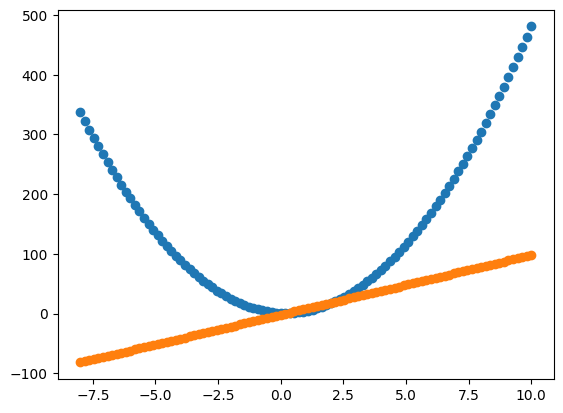

In [32]:
x_points = np.linspace(-8, 10, 100)
y_points = my_quadratic(x_points)
y_deriv = my_quadratic_deriv(x_points)
plt.scatter(x_points, y_points)
plt.scatter(x_points, y_deriv)
plt.show()

# נבדוק חישוב נומרי של הנגזרת

## תזכורת: ניתן לקרב נגזרת ע"י חישוב השיפוע במרחק של אפסילון
---
# Let's look at a numerical calculation of the derivative

## Reminder: A derivative can be approximated by calculating the slope at a distance of epsilon

### Forward Difference Approximation - נגזרת קדמית
$$
f'(x) \approx \frac{f(x + \epsilon) - f(x)}{\epsilon}
$$

### Backward Difference Approximation - נגזרת אחורית
$$
f'(x) \approx \frac{f(x) - f(x - \epsilon)}{\epsilon}
$$

### Central (Bidirectional) Difference Approximation - נגזרת דו-כיוונית
$$
f'(x) \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}
$$


כעת, עבור אוסף נקודות, נחשב את שלוש השיטות לחישוב הנגזרת, ונשווה את התוצאות שלהן לתוצאה התיאורטית.
נבדוק את ההשפעה של בחירת אפסילון ושל סוג החישוב על הטעות הסופית הממוצעת.

## שימו לב: המתודה מקבלת שתי פונקציות כפרמטרים. אחת מיישמת את הפונקציה המקורית, והשנייה מיישמת את הנגזרת שלה.
## זה מאפשר להחליף פונקציות בעתיד בצורה פשוטה.
---
Now, for a collection of points, we consider the three methods for calculating the derivative, and compare their results with the theoretical result.
We will examine the effect of the choice of epsilon and the type of calculation on the average final error.

## Note: The method accepts two functions as parameters. One implements the original function, and the other implements its derivative.
## This allows for easy replacement of functions in the future.



In [33]:
def calc_derivs(function,function_deriv, x,epsilon):

  # Calculate the errors in the three derivative options
  # Calculate analytical derivative
  analytical_deriv = function_deriv(x)

  # Forward difference: (f(x + ε) - f(x)) / ε
  forward_deriv = (function(x + epsilon) - function(x)) / epsilon

  # Backward difference: (f(x) - f(x - ε)) / ε
  backward_deriv = (function(x) - function(x - epsilon)) / epsilon

  # Central/bidirectional difference: (f(x + ε) - f(x - ε)) / (2ε)
  bidirectional_deriv = (function(x + epsilon) - function(x - epsilon)) / (2 * epsilon)

  # Calculate absolute errors
  error_forward = np.abs(forward_deriv - analytical_deriv)
  error_backward = np.abs(backward_deriv - analytical_deriv)
  error_bidirectional = np.abs(bidirectional_deriv - analytical_deriv)

  return error_forward, error_backward, error_bidirectional


# נחשב את הטעות הממוצעת עבור ערכי אפסילון שונים וערכי איקס שונים
# נשמור את התוצאות בצורה מסודרת בדאטהפריים של פאנדס
---
# Calculate the mean error for different epsilon values and different x values
# Store the results neatly in a Funds dataframe

In [34]:
left_x = -5.0
right_x = 10.0
my_x = np.linspace(left_x,right_x,100)

epsilons = np.linspace(-1,-9,17).astype('float64')
# Replace epsilons with 10 to the power of epsilons
epsilons = np.power(10, epsilons).astype('float64')


# Create a dataframe with all types being float:
results_df = pd.DataFrame({
    'index': pd.Series(dtype='int'),
    'epsilon': pd.Series(dtype='float'),
    'error_forward': pd.Series(dtype='float64'),
    'error_backward': pd.Series(dtype='float64'),
    'error_bidirectional': pd.Series(dtype='float64')
})

# Fill the dataframe with the results:
for index, epsilon in enumerate(epsilons):
    # Calculate errors for all x points using vectorized operations
    errors_forward, errors_backward, errors_bidirectional = calc_derivs(my_quadratic, my_quadratic_deriv, my_x, epsilon)

    # Calculate mean errors across all x points
    mean_error_forward = np.mean(errors_forward)
    mean_error_backward = np.mean(errors_backward)
    mean_error_bidirectional = np.mean(errors_bidirectional)

    # Add results to dataframe
    new_row = pd.DataFrame({
        'index': [index],
        'epsilon': [epsilon],
        'error_forward': [mean_error_forward],
        'error_backward': [mean_error_backward],
        'error_bidirectional': [mean_error_bidirectional]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)


display(results_df.dtypes)
results_df


index                    int64
epsilon                float64
error_forward          float64
error_backward         float64
error_bidirectional    float64
dtype: object

,index,epsilon,error_forward,error_backward,error_bidirectional
0,0,1.000000e-01,5.000000e-01,5.000000e-01,1.193712e-13
1,1,3.162278e-02,1.581139e-01,1.581139e-01,4.671979e-13
2,2,1.000000e-02,5.000000e-02,5.000000e-02,9.533907e-13
3,3,3.162278e-03,1.581139e-02,1.581139e-02,2.498579e-12
4,4,1.000000e-03,5.000000e-03,5.000000e-03,1.664894e-11
5,5,3.162278e-04,1.581139e-03,1.581139e-03,4.354242e-11
6,6,1.000000e-04,5.000000e-04,5.000001e-04,1.018214e-10
7,7,3.162278e-05,1.581139e-04,1.581138e-04,2.419631e-10
8,8,1.000000e-05,4.999918e-05,5.000102e-05,1.299395e-09
9,9,3.162278e-06,1.580783e-05,1.581504e-05,5.224429e-09


# נציג גרף של הטעות הממוצעת כפונקציה של אפסילון
## שימו לב: הסקאלות הן לוגריתמיות בשני הצירים

# Graph of the mean error as a function of epsilon
## Note: The scales are logarithmic on both axes

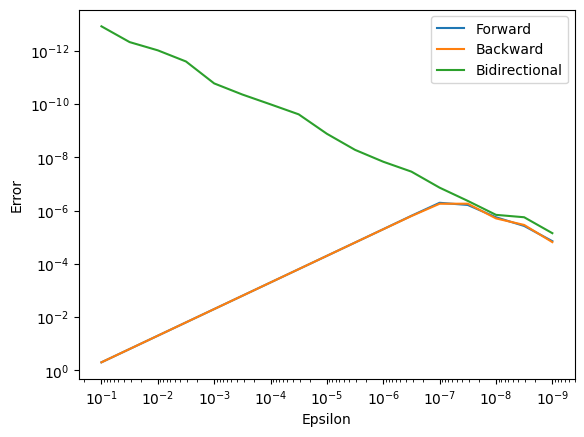

In [35]:
plt.plot(results_df['epsilon'], results_df['error_forward'], label='Forward')
plt.plot(results_df['epsilon'], results_df['error_backward'], label='Backward')
plt.plot(results_df['epsilon'], results_df['error_bidirectional'], label='Bidirectional')
plt.xlabel('Epsilon')
plt.ylabel('Error')

# Set x scale to logarithmic
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.legend()
plt.show()


# חלק 2
## נגזרת של פונקציה ב-2 משתנים

---

# Part 2
## Derivative of a function with 2 variables

In [36]:
def multinomial(x):
  x0 = x[0]
  x1 = x[1]
  return x0*x0*x0 - x1*x1*x1 + 2*x0*x0*x1 + 5*x0*x1*x1 - 6*x1*x1 +3

# לשם המחשה: כך נראה הגרף התלת-מימדי של הפונקציה. שניים מן הצירים הם שני הפרמטרים, והגובה הוא התוצאה

---

# For illustration: This is what the 3D graph of the function looks like. Two of the axes are the two parameters, and the height is the result

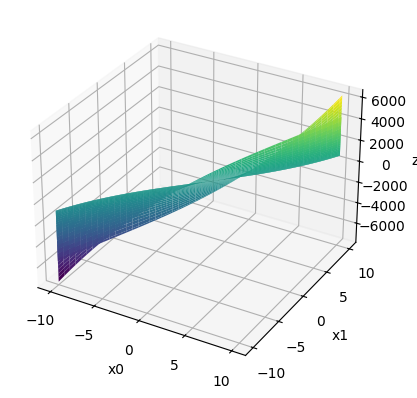

In [37]:
# Plot the 3d surface of the two-dimensional function in multinomial(x0,x1):

x0_points = np.linspace(-10, 10, 100)
x1_points = np.linspace(-10, 10, 100)
x01_points = np.meshgrid(x0_points, x1_points)
z_points = multinomial(x01_points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0_points, x1_points, z_points, cmap='viridis')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
plt.show()


# חשבו את הגראדיינט (נגזרת כיוונית) של הפונקציה
## שימו לב: הפונקציה המקורית מקבלת שני משתנים ומחזירה מספר אחד
## לעומת זאת, הגראדיינט הוא **וקטור** שאורכו כמספר המשתנים שמקבלת הפונקציה המקורית
## החזירו את התוצאה בפורמט של
## np.array

---

# Calculate the gradient (directional derivative) of the function
## Note: The original function takes two variables and returns one number
## In contrast, the gradient is a **vector** whose length is the number of variables taken by the original function
## Return the result in the format of
## np.array


In [38]:
def multinomial_deriv(x):
  # X is a vector containing the two features (coordinates):
  x0 = x[0]
  x1 = x[1]
  
  # Calculate partial derivatives
  # Original function: x0³ - x1³ + 2x0²x1 + 5x0x1² - 6x1² + 3
  
  # ∂f/∂x0 = 3x0² + 4x0x1 + 5x1²
  partial_x0 = 3*x0*x0 + 4*x0*x1 + 5*x1*x1
  
  # ∂f/∂x1 = -3x1² + 2x0² + 10x0x1 - 12x1
  partial_x1 = -3*x1*x1 + 2*x0*x0 + 10*x0*x1 - 12*x1
  
  return np.array([partial_x0, partial_x1])

# כעת בצעו חישוב נומרי של הנגזרת, כמו בסעיף הקודם - אבל עבור פונקציה דו-מימדית
## שימו לב: הפעם אפשר לחשב רק בשיטה אחת מבין השלוש - בחרו בשיטה שהיתה המוצלחת ביותר בסעיף הראשון
# נזכור שהתוצאה תהיה וקטור בגודל 2

---

# Now perform a numerical calculation of the derivative, as in the previous section - but for a two-dimensional function
## Note: This time you can only calculate using one of the three methods - choose the method that was most successful in the first section
# Remember that the result will be a vector of size 2

In [39]:
def calculate_derivative_at_point(function, x, epsilon):
  # Use central difference method (most successful from first section)
  # For 2D function, calculate partial derivatives for each dimension
  
  # Calculate partial derivative with respect to x[0]
  x_plus_0 = x.copy()
  x_minus_0 = x.copy()
  x_plus_0[0] += epsilon
  x_minus_0[0] -= epsilon
  partial_x0 = (function(x_plus_0) - function(x_minus_0)) / (2 * epsilon)
  
  # Calculate partial derivative with respect to x[1]
  x_plus_1 = x.copy()
  x_minus_1 = x.copy()
  x_plus_1[1] += epsilon
  x_minus_1[1] -= epsilon
  partial_x1 = (function(x_plus_1) - function(x_minus_1)) / (2 * epsilon)
  
  deriv = np.array([partial_x0, partial_x1])
  return deriv

# כעת, בדומה לסעיף הקודם - נחשב את ההפרש בין התוצאה התיאורטית והמעשית ונציג אותו

---

# Now, similar to the previous section - we will calculate the difference between the theoretical and practical result and present it

In [40]:
# Create a random grid of 2D vectors where each dimsion is between -20 and 20:
random_vectors = np.random.uniform(-20, 20, (100, 2))

results_df = pd.DataFrame({
    'index': pd.Series(dtype='int'),
    'epsilon': pd.Series(dtype='float'),
    'error': pd.Series(dtype='float64')
})


for index, epsilon in enumerate(epsilons):
    errors = []
    
    # Calculate errors for each random vector
    for vector in random_vectors:
        # Calculate numerical derivative
        numerical_deriv = calculate_derivative_at_point(multinomial, vector, epsilon)
        
        # Calculate analytical derivative
        analytical_deriv = multinomial_deriv(vector)
        
        # Calculate error as L2 norm of difference
        error = np.linalg.norm(numerical_deriv - analytical_deriv)
        errors.append(error)
    
    # Calculate mean error across all test points
    mean_error = np.mean(errors)
    
    # Add results to dataframe
    new_row = pd.DataFrame({
        'index': [index],
        'epsilon': [epsilon],
        'error': [mean_error]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)


results_df;

# כעת שוב נציג בגרף את ההשפעה של אפסילון על הטעות הממוצעת

# Now we will again graph the effect of epsilon on the average error

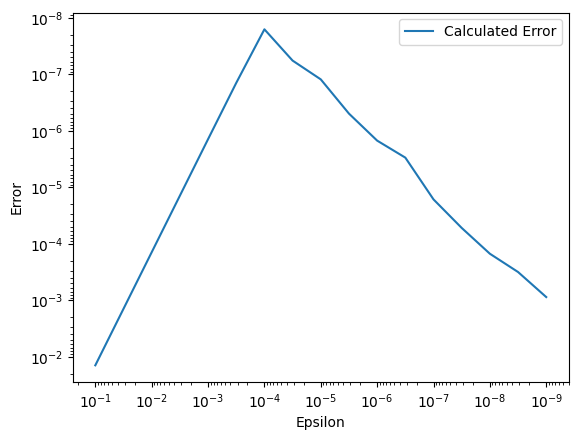

In [41]:
plt.plot(results_df['epsilon'], results_df['error'], label='Calculated Error')
plt.xlabel('Epsilon')
plt.ylabel('Error')

# Set x scale to logarithmic
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.legend()
plt.show()


# חלק 3: פונקצית הטעות הריבועית של בעיית רגרסיה לינארית
# אם הדאטה שלנו נתון כמטריצת פיצ'רים ולצידה וקטור תוצאות

##$$   Features:  \begin{Vmatrix}\textbf{X}\end{Vmatrix}    \hspace{1cm}, \hspace{1cm}  results:   \vec{y}$$

<p align="right">

## תזכורת:

בהנתן וקטור משקלות (שיכול להוות פתרון לבעיית הרגרסיה הלינארית) ויסומן ב-

$$ \vec{w} = [w_i] $$

אז בהנתן קלט איקס, הניבוי שלנו הוא:

$$ \vec{y}^{pred} = X^{train} * \vec{w} $$

והשגיאה הריבועית הממוצעת היא:


## MSE Loss
$$L(\vec{w}) = MSE(\vec{w}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - y^{pred} _{i})^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - X^{train}_i \vec{w})^2$$

שימו לב: איקס הוא קבוע (סט האימון), ואנחנו מחפשים בהינתן איקס, את


$$ \vec{w}  $$

האופטימילי - זה שעבורו פונקציית הטעות תהיה הכי נמוכה עבור הדאטה שאותו אנחנו לומדים (סט האימון)

---

# Part 3: The squared error function of a linear regression problem
# If our data is given as a feature matrix and a result vector

##$$ Features: \begin{Vmatrix}\textbf{X}\end{Vmatrix} \hspace{1cm}, \hspace{1cm} results: \vec{y}$$

<p align="right">

## Reminder:

Given a weight vector (which can be a solution to the linear regression problem) and denoted by

$$ \vec{w} = [w_i] $$

Then given an input x, our prediction is:

$$ \vec{y}^{pred} = X^{train} * \vec{w} $$

And the mean squared error is:

## MSE Loss
$$L(\vec{w}) = MSE(\vec{w}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - y^{pred} _{i})^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - X^{train}_i \vec{w})^2$$

Note: X is a constant (the training set), and we are looking for, given X, the

$$ \vec{w} $$

optimal - the one for which the error function will be the lowest for the data we are learning (the training set)

In [42]:
# 1. Create synthetic dataset
np.random.seed(43)
n = 100  # number of samples
d = 5    # number of dimensions

X = np.random.randn(n, d)
#w_true = np.array([2.0, -1.5, 0.7])
w_true = np.random.randint(-20, 21, size=d) / 10
noise = np.random.randn(n) * 0.5

y = X @ w_true + noise


## כעת ננסה למצוא את ערכי המשקלות
$$ \vec{w} = [w_i] $$
## פשוט ע"י הגרלה וניחוש, כדי לקבל תחושה של הבעייה
## לכל ערך שיוגרל נחשב את השגיאה הריבועית הממוצעת.
## נבחר את הערך שהביא לתוצאה הטובה ביותר, וגם נציג היסטוגרמה של ערכי השגיאות שחושבו בכל ההגרלות

---

## Now we will try to find the values of the weights
$$ \vec{w} = [w_i] $$
## Simply by drawing lots and guessing, to get a feel for the problem
## For each value drawn, the mean square error is calculated.
## We will choose the value that gave the best result, and we will also present a histogram of the error values calculated in all draws

True w:     [1.2 0.3 0.7 0.  1.8]
Best guess: [1.3197194  0.21872577 0.3270207  0.36296724 1.38453443]
Best MSE:   0.6219
Ideal MSE:  0.2373


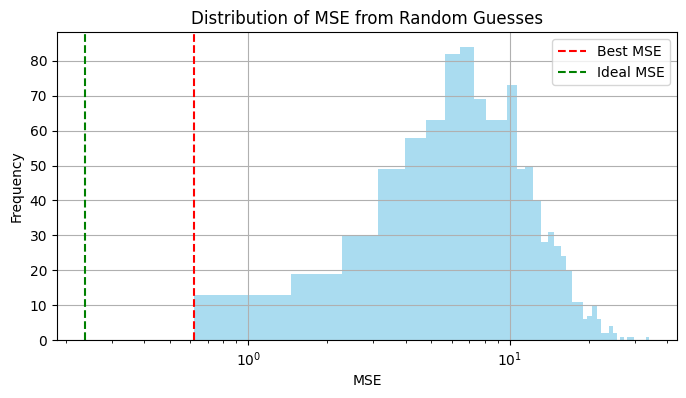

In [43]:
# 2. Try random guesses for w
n_guesses = 1000
mse_list = []
w_guesses = []

# Calculate ideal prediction and MSE using true weights
ideal_y = X @ w_true
ideal_mse = np.mean((y - ideal_y) ** 2)


for _ in range(n_guesses):
    # Generate random weight guess
    w_guess = np.random.randn(d)
    
    # Make prediction with guessed weights
    y_pred = X @ w_guess
    
    mse = np.mean((y - y_pred) ** 2)
    mse_list.append(mse)
    w_guesses.append(w_guess)

# 3. Find best guess
best_idx = np.argmin(mse_list)
best_w = w_guesses[best_idx]
best_mse = mse_list[best_idx]

print(f"True w:     {w_true}")
print(f"Best guess: {best_w}")
print(f"Best MSE:   {best_mse:.4f}")
print(f"Ideal MSE:  {ideal_mse:.4f}")

# 4. Plot histogram of MSE values
plt.figure(figsize=(8, 4))
plt.hist(mse_list, bins=40, alpha=0.7, color='skyblue')
plt.axvline(best_mse, color='red', linestyle='--', label='Best MSE')
plt.axvline(ideal_mse, color='green', linestyle='--', label='Ideal MSE')
plt.title("Distribution of MSE from Random Guesses")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

# נראה את התקדמות ההגרלה הטובה ביותר עם הזמן

---

# We will see the best lottery progress over time

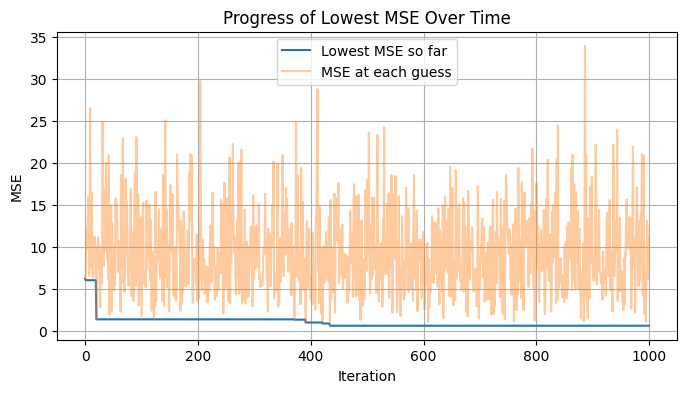

In [44]:
mse_list_lowest_yet = np.minimum.accumulate(mse_list)

plt.figure(figsize=(8, 4))
plt.plot(mse_list_lowest_yet, label="Lowest MSE so far")
plt.plot(mse_list, alpha=0.4, label="MSE at each guess")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Progress of Lowest MSE Over Time")
plt.grid(True)
plt.legend()
plt.show()
